# Major Leagues

## Introduction



In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sn
from sklearn import linear_model

## Data

In [17]:
dfFoot=pd.read_csv("/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-4-Khan/Data/RawData/nfl_games.csv")
dfFoot

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947000,1300.000000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420000,1300.000000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420000,1300.000000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002000,1504.908000,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108000,1478.004000,0.644171,45,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16269,2019-01-13,2018,0,1,NE,LAC,1640.171960,1647.624483,0.582068,41,28,1.0
16270,2019-01-13,2018,0,1,NO,PHI,1669.105861,1633.114673,0.641378,20,14,1.0
16271,2019-01-20,2018,0,1,NO,LAR,1682.450194,1648.424105,0.638772,23,26,0.0
16272,2019-01-20,2018,0,1,KC,NE,1675.286412,1661.668566,0.611248,31,37,0.0


In [18]:
dfFoot=dfFoot.drop(columns='elo1')
dfFoot=dfFoot.drop(columns='elo2')
dfFoot=dfFoot.drop(columns='score1')
dfFoot=dfFoot.drop(columns='score2')
dfFoot

,date,season,neutral,playoff,team1,team2,elo_prob1,result1
0,1920-09-26,1920,0,0,RII,STP,0.824651,1.0
1,1920-10-03,1920,0,0,AKR,WHE,0.824212,1.0
2,1920-10-03,1920,0,0,RCH,ABU,0.824212,1.0
3,1920-10-03,1920,0,0,DAY,COL,0.575819,1.0
4,1920-10-03,1920,0,0,RII,MUN,0.644171,1.0
...,...,...,...,...,...,...,...,...
16269,2019-01-13,2018,0,1,NE,LAC,0.582068,1.0
16270,2019-01-13,2018,0,1,NO,PHI,0.641378,1.0
16271,2019-01-20,2018,0,1,NO,LAR,0.638772,0.0
16272,2019-01-20,2018,0,1,KC,NE,0.611248,0.0


In [19]:
dfFoot2=pd.read_csv("/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-4-Khan/Data/RawData/nfl_elo.csv")
dfFoot2

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,NaN,AKR,WHE,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0
2,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
3,1920-10-03,1920,0,NaN,DAY,COL,1493.002,1504.908,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,1920-10-03,1920,0,NaN,RCH,ABU,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,2021-01-17,2020,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16806,2021-01-17,2020,0,d,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16807,2021-01-24,2020,0,c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16808,2021-01-24,2020,0,c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfFoot2=dfFoot2.drop(columns='playoff')
dfFoot2.head()

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,RII,STP,1503.947,1300.000,0.824651,0.175349,1516.108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,AKR,WHE,1503.420,1300.000,0.824212,0.175788,1515.278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0
2,1920-10-03,1920,0,RII,MUN,1516.108,1478.004,0.644171,0.355829,1542.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
3,1920-10-03,1920,0,DAY,COL,1493.002,1504.908,0.575819,0.424181,1515.434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,1920-10-03,1920,0,RCH,ABU,1503.420,1300.000,0.824212,0.175788,1510.934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0


In [27]:
dfAll=pd.merge(dfFoot, dfFoot2, left_on=['date', 'team1', 'team2', 'neutral', 'season', 'elo_prob1'], right_on=['date', 'team1', 'team2', 'neutral', 'season', 'elo_prob1'])
dfAll

,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,elo2_pre,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,0,RII,STP,0.824651,1.0,1503.947000,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,0,AKR,WHE,0.824212,1.0,1503.420000,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0
2,1920-10-03,1920,0,0,RCH,ABU,0.824212,1.0,1503.420000,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0
3,1920-10-03,1920,0,0,DAY,COL,0.575819,1.0,1493.002000,1504.908000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,1920-10-03,1920,0,0,RII,MUN,0.644171,1.0,1516.108000,1478.004000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16261,2019-01-13,2018,0,1,NE,LAC,0.582068,1.0,1640.171960,1647.624483,...,0.674251,0.325749,364.965112,168.815622,233.039347,167.622048,1656.246942,1622.084055,41.0,28.0
16262,2019-01-13,2018,0,1,NO,PHI,0.641378,1.0,1669.105861,1633.114673,...,0.717901,0.282099,211.701387,109.954117,232.160805,176.540866,1659.143400,1599.382896,20.0,14.0
16263,2019-01-20,2018,0,1,NO,LAR,0.638772,0.0,1682.450194,1648.424105,...,0.634698,0.365302,154.365034,179.912314,224.381228,175.160616,1640.743194,1657.938921,23.0,26.0
16264,2019-01-20,2018,0,1,KC,NE,0.611248,0.0,1675.286412,1661.668566,...,0.615809,0.384191,187.826168,198.704277,243.173807,229.605840,1618.987574,1681.140535,31.0,37.0


In [28]:
dfAll.describe()

,season,neutral,playoff,elo_prob1,result1,elo1_pre,elo2_pre,elo_prob2,elo1_post,elo2_post,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
count,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.00000,16266.000000,...,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,16266.000000,16266.000000
mean,1982.436801,0.005226,0.034674,0.584831,0.580598,1502.429704,1498.885184,0.415169,1502.31063,1499.004259,...,0.575528,0.424472,105.465425,84.192254,93.503005,91.388793,1503.877181,1502.393509,21.542912,18.578507
std,25.448631,0.072102,0.182957,0.175328,0.488562,105.008431,104.535931,0.175328,107.61602,106.688699,...,0.177649,0.177649,132.484315,130.280547,56.122253,55.462760,102.578990,101.113697,11.289349,10.793522
min,1920.000000,0.000000,0.000000,0.070953,0.000000,1119.595000,1156.551000,0.029484,1119.59500,1153.902000,...,0.059810,0.032803,-385.737110,-413.971659,-46.329533,-53.778917,1164.327676,1149.699743,0.000000,0.000000
25%,1967.000000,0.000000,0.000000,0.461151,0.000000,1429.205750,1425.824250,0.280008,1426.92875,1423.794750,...,0.447612,0.286340,12.481152,-7.944187,52.593737,51.170463,1432.153322,1431.524846,14.000000,10.000000
50%,1987.000000,0.000000,0.000000,0.596354,1.000000,1503.994000,1500.150000,0.403646,1503.98800,1500.214500,...,0.586768,0.413232,102.333554,79.846517,88.294190,86.774155,1504.674811,1504.474152,21.000000,17.000000
75%,2003.000000,0.000000,0.000000,0.719992,1.000000,1578.046500,1575.694250,0.538849,1580.71750,1576.832500,...,0.713660,0.552388,196.006350,172.128385,127.862237,125.981915,1578.175013,1574.742489,28.000000,26.000000
max,2018.000000,1.000000,1.000000,0.970516,1.000000,1839.663000,1849.484000,0.929047,1849.48400,1831.462000,...,0.967197,0.940190,713.695222,605.098179,327.716545,329.562716,1814.366226,1806.223590,72.000000,73.000000


In [29]:
dfAll.dtypes

date               object
season              int64
neutral             int64
playoff             int64
team1              object
team2              object
elo_prob1         float64
result1           float64
elo1_pre          float64
elo2_pre          float64
elo_prob2         float64
elo1_post         float64
elo2_post         float64
qbelo1_pre        float64
qbelo2_pre        float64
qb1                object
qb2                object
qb1_value_pre     float64
qb2_value_pre     float64
qb1_adj           float64
qb2_adj           float64
qbelo_prob1       float64
qbelo_prob2       float64
qb1_game_value    float64
qb2_game_value    float64
qb1_value_post    float64
qb2_value_post    float64
qbelo1_post       float64
qbelo2_post       float64
score1            float64
score2            float64
dtype: object

In [34]:
dfAll['team1'] = dfAll['team1'].astype("string")
dfAll['team2'] = dfAll['team2'].astype("string")
dfAll['qb1'] = dfAll['qb1'].astype("string")
dfAll['qb2'] = dfAll['qb2'].astype("string")
dfAll['date'] = dfAll['date'].astype("string")

In [40]:
new = dfAll["date"].str.split("-", n = 1, expand = True)
dfAll["year"]=new[0]
dfAll["month"]=new[1]
#dfAll["day"]=new[2]
dfAll.head()

,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,elo2_pre,...,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month
0,1920-09-26,1920,0,0,RII,STP,0.824651,1.0,1503.947,1300.000,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0,1920,09-26
1,1920-10-03,1920,0,0,AKR,WHE,0.824212,1.0,1503.420,1300.000,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0,1920,10-03
2,1920-10-03,1920,0,0,RCH,ABU,0.824212,1.0,1503.420,1300.000,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0,1920,10-03
3,1920-10-03,1920,0,0,DAY,COL,0.575819,1.0,1493.002,1504.908,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0,1920,10-03
4,1920-10-03,1920,0,0,RII,MUN,0.644171,1.0,1516.108,1478.004,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0,1920,10-03


In [41]:
new = dfAll["month"].str.split("-", n = 1, expand = True)
dfAll["month"]=new[0]
dfAll["day"]=new[1]
#dfAll["day"]=new[2]
dfAll.head()

,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,elo2_pre,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month,day
0,1920-09-26,1920,0,0,RII,STP,0.824651,1.0,1503.947,1300.000,...,NaN,NaN,NaN,NaN,NaN,48.0,0.0,1920,09,26
1,1920-10-03,1920,0,0,AKR,WHE,0.824212,1.0,1503.420,1300.000,...,NaN,NaN,NaN,NaN,NaN,43.0,0.0,1920,10,03
2,1920-10-03,1920,0,0,RCH,ABU,0.824212,1.0,1503.420,1300.000,...,NaN,NaN,NaN,NaN,NaN,10.0,0.0,1920,10,03
3,1920-10-03,1920,0,0,DAY,COL,0.575819,1.0,1493.002,1504.908,...,NaN,NaN,NaN,NaN,NaN,14.0,0.0,1920,10,03
4,1920-10-03,1920,0,0,RII,MUN,0.644171,1.0,1516.108,1478.004,...,NaN,NaN,NaN,NaN,NaN,45.0,0.0,1920,10,03


In [43]:
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16266 entries, 0 to 16265
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            16266 non-null  string 
 1   season          16266 non-null  int64  
 2   neutral         16266 non-null  int64  
 3   playoff         16266 non-null  int64  
 4   team1           16266 non-null  string 
 5   team2           16266 non-null  string 
 6   elo_prob1       16266 non-null  float64
 7   result1         16266 non-null  float64
 8   elo1_pre        16266 non-null  float64
 9   elo2_pre        16266 non-null  float64
 10  elo_prob2       16266 non-null  float64
 11  elo1_post       16266 non-null  float64
 12  elo2_post       16266 non-null  float64
 13  qbelo1_pre      14105 non-null  float64
 14  qbelo2_pre      14105 non-null  float64
 15  qb1             14105 non-null  string 
 16  qb2             14105 non-null  string 
 17  qb1_value_pre   14105 non-null 

In [46]:
dfAll.dropna(subset = ["qbelo1_pre"], inplace=True)
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14105 entries, 2161 to 16265
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14105 non-null  string 
 1   season          14105 non-null  int64  
 2   neutral         14105 non-null  int64  
 3   playoff         14105 non-null  int64  
 4   team1           14105 non-null  string 
 5   team2           14105 non-null  string 
 6   elo_prob1       14105 non-null  float64
 7   result1         14105 non-null  float64
 8   elo1_pre        14105 non-null  float64
 9   elo2_pre        14105 non-null  float64
 10  elo_prob2       14105 non-null  float64
 11  elo1_post       14105 non-null  float64
 12  elo2_post       14105 non-null  float64
 13  qbelo1_pre      14105 non-null  float64
 14  qbelo2_pre      14105 non-null  float64
 15  qb1             14105 non-null  string 
 16  qb2             14105 non-null  string 
 17  qb1_value_pre   14105 non-nu

In [47]:
dfAll

,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,elo2_pre,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month,day
2161,1950-09-16,1950,0,0,PHI,CLE,0.629402,0.0,1674.314000,1647.304000,...,275.220000,-12.309000,27.522000,1630.613026,1685.827280,10.0,35.0,1950,09,16
2162,1950-09-17,1950,0,0,PIT,NYG,0.625529,0.0,1485.849000,1461.717000,...,-54.120000,-3.498000,-5.412000,1454.118729,1493.988602,7.0,18.0,1950,09,17
2163,1950-09-17,1950,0,0,LAR,CHI,0.501321,0.0,1564.606000,1628.688000,...,-30.030000,-1.221000,-3.003000,1549.226817,1643.798965,20.0,24.0,1950,09,17
2164,1950-09-17,1950,0,0,BCL,WSH,0.425851,0.0,1337.541000,1454.448000,...,251.790000,0.363000,25.179000,1310.867671,1481.487455,14.0,38.0,1950,09,17
2165,1950-09-17,1950,0,0,SF,NYY,0.871695,0.0,1589.774000,1321.925000,...,28.050000,1.056000,2.805000,1557.813303,1355.019109,17.0,21.0,1950,09,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16261,2019-01-13,2018,0,1,NE,LAC,0.582068,1.0,1640.171960,1647.624483,...,168.815622,233.039347,167.622048,1656.246942,1622.084055,41.0,28.0,2019,01,13
16262,2019-01-13,2018,0,1,NO,PHI,0.641378,1.0,1669.105861,1633.114673,...,109.954117,232.160805,176.540866,1659.143400,1599.382896,20.0,14.0,2019,01,13
16263,2019-01-20,2018,0,1,NO,LAR,0.638772,0.0,1682.450194,1648.424105,...,179.912314,224.381228,175.160616,1640.743194,1657.938921,23.0,26.0,2019,01,20
16264,2019-01-20,2018,0,1,KC,NE,0.611248,0.0,1675.286412,1661.668566,...,198.704277,243.173807,229.605840,1618.987574,1681.140535,31.0,37.0,2019,01,20


In [82]:
dfKC=dfAll.query("team1 == 'KC' or team2 == 'KC'")[['season', 'neutral', 'playoff', 'team1', 'team2', 'elo_prob1', 'elo_prob2', 'result1', 'elo1_pre', 'elo2_pre', 'elo1_post', 'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'year', 'month', 'day']]

In [78]:
#dfKC=dfAll.query("team1 == 'KC' or team2 == 'KC'")[['season', 'neutral', 'playoff', 'team1', 'team2',
#       'elo_prob1', 'elo_prob2', 'result1', 'elo1_pre', 'elo2_pre', 'elo1_post', 'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value']]

In [79]:
dfKC

,season,neutral,playoff,team1,team2,elo_prob1,elo_prob2,result1,elo1_pre,elo2_pre,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month,day
2903,1960,0,0,LAC,KC,0.592466,0.407534,1.0,1300.000000,1300.000000,...,153.120000,31.614000,11.872908,1305.532159,1294.467841,21.0,20.0,1960,09,10
2906,1960,0,0,OAK,KC,0.552525,0.447475,0.0,1266.146000,1294.513000,...,185.463743,3.620474,29.231991,1237.400627,1327.815491,16.0,34.0,1960,09,16
2914,1960,0,0,KC,LAC,0.645457,0.354543,1.0,1327.601000,1288.522000,...,-222.125788,24.814603,33.270328,1349.269932,1269.050479,17.0,0.0,1960,09,25
2926,1960,0,0,KC,NYJ,0.632338,0.367662,0.0,1347.170000,1317.970000,...,359.737534,50.155286,72.762631,1335.541105,1334.409934,35.0,37.0,1960,10,02
2930,1960,0,0,KC,OAK,0.726680,0.273320,0.0,1332.655000,1227.786000,...,-6.644977,44.252783,20.337232,1324.428886,1244.606640,19.0,20.0,1960,10,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16207,2018,0,0,KC,LAC,0.659710,0.340290,0.0,1681.332786,1631.330875,...,85.129060,263.317503,206.538221,1645.049516,1632.226103,28.0,29.0,2018,12,13
16237,2018,0,0,SEA,KC,0.461475,0.538525,1.0,1579.860028,1671.682818,...,303.495522,198.178338,267.335305,1585.233229,1620.068427,38.0,31.0,2018,12,23
16249,2018,0,0,KC,OAK,0.883113,0.116887,1.0,1649.009776,1362.709331,...,-11.685406,258.885378,130.211482,1626.276883,1342.908173,35.0,3.0,2018,12,30
16259,2018,0,1,KC,IND,0.656753,0.343247,1.0,1656.058181,1608.340079,...,83.240743,249.323545,224.567804,1643.881166,1584.600672,31.0,13.0,2019,01,12


In [80]:
corrMatrix = dfKC.corr()
#print(corrMatrix)

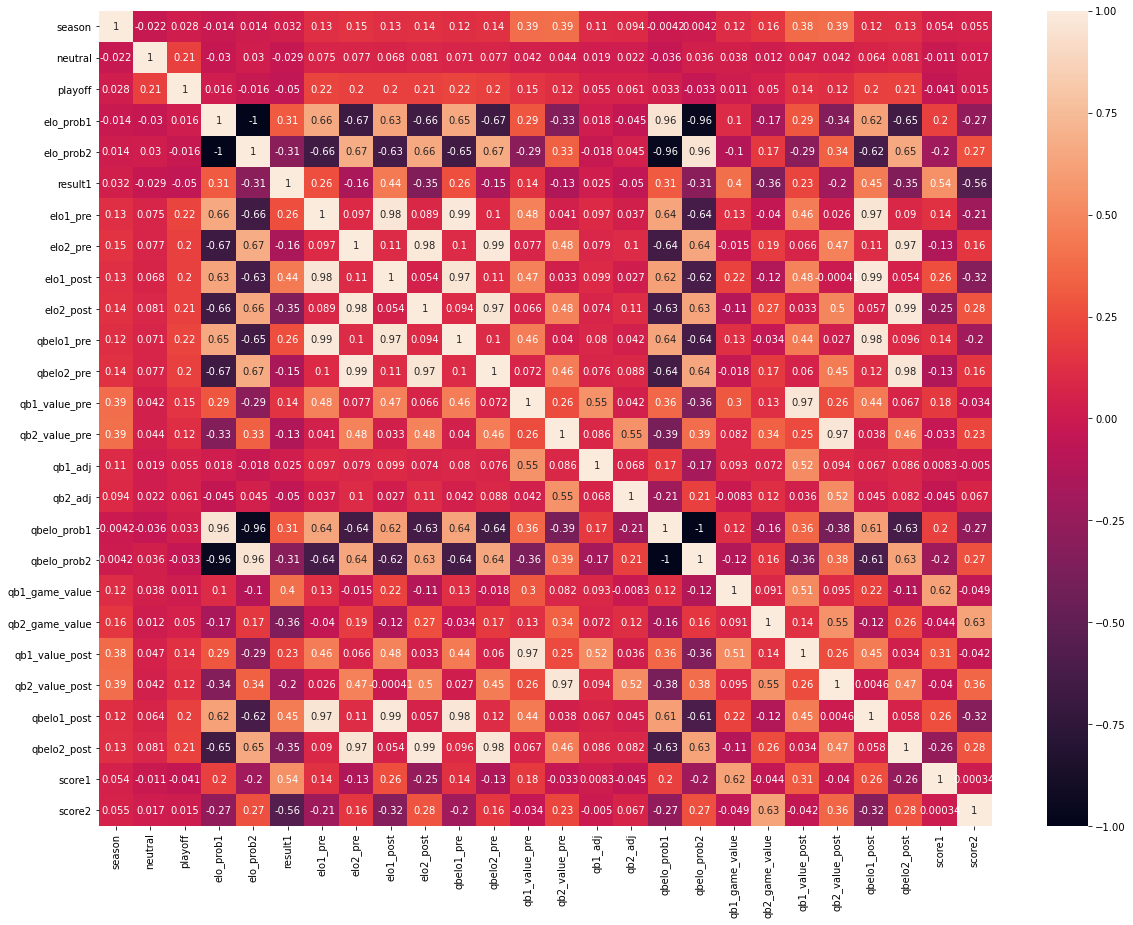

In [81]:
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [84]:
dfPIT=dfAll.query("team1 == 'PIT' or team2 == 'PIT'")[['season', 'neutral', 'playoff', 'team1', 'team2', 'elo_prob1', 'elo_prob2', 'result1', 'elo1_pre', 'elo2_pre', 'elo1_post', 'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'year', 'month', 'day']]


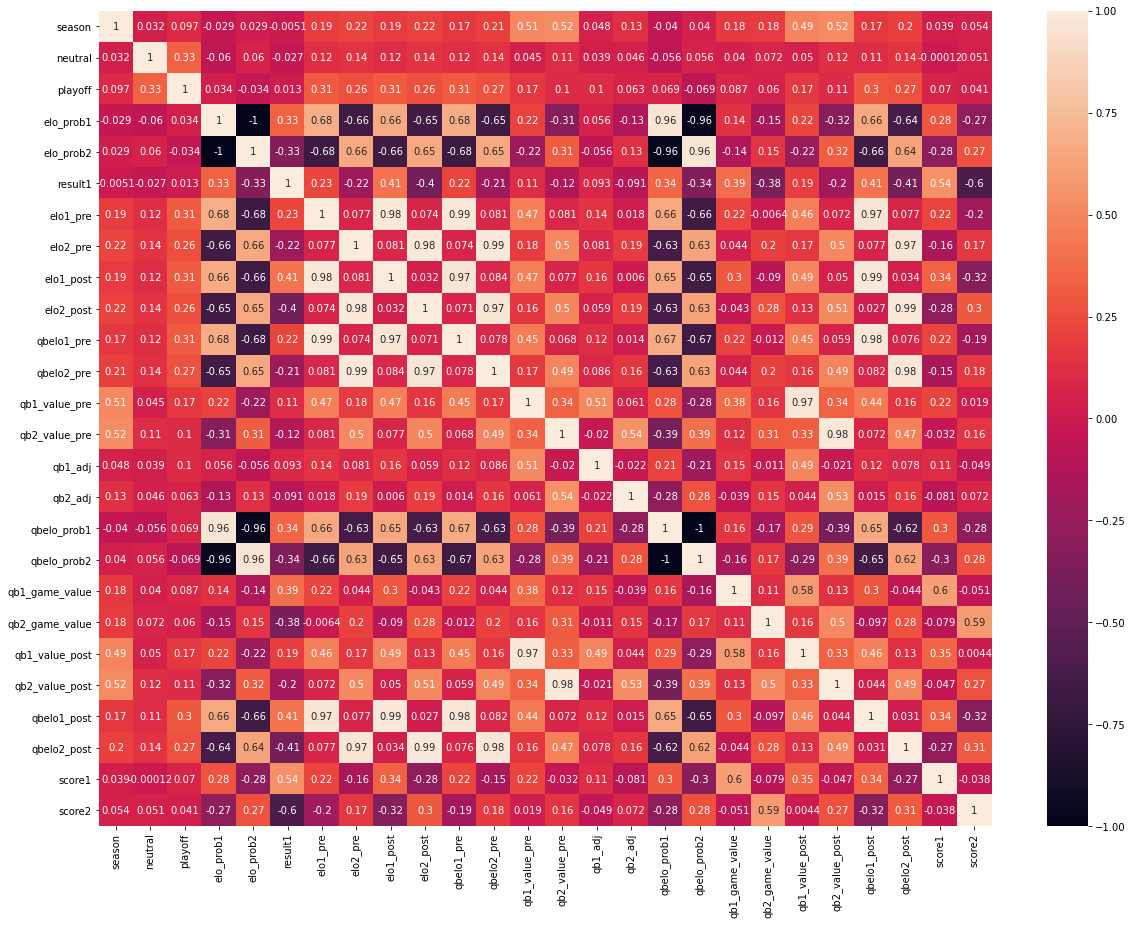

In [85]:
corrMatrix = dfPIT.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

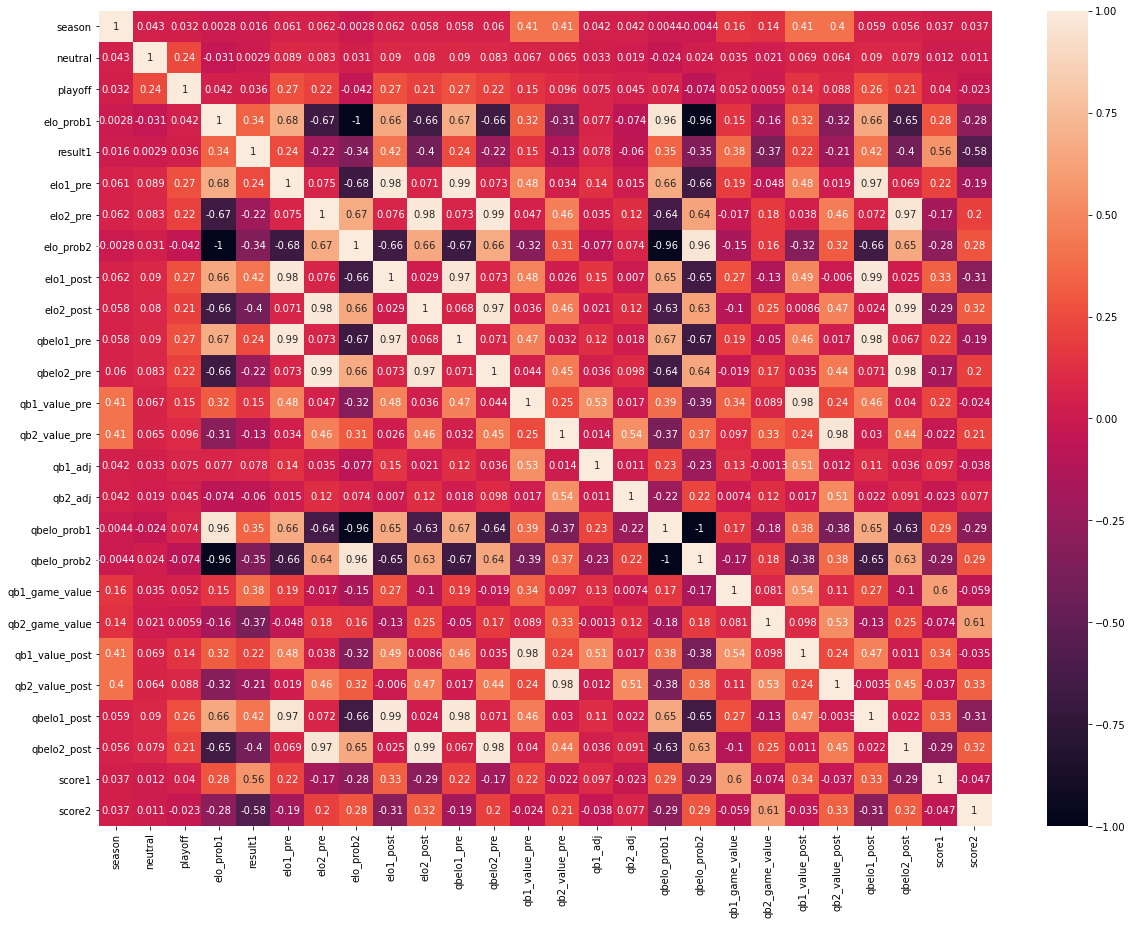

In [86]:
corrMatrix = dfAll.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

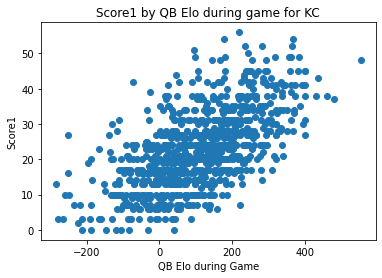

In [121]:
plt.scatter(dfKC['qb1_game_value'], dfKC['score1'])
plt.title('Score1 by QB Elo during game for KC')
plt.ylabel('Score1')
plt.xlabel('QB Elo during Game')
plt.show()

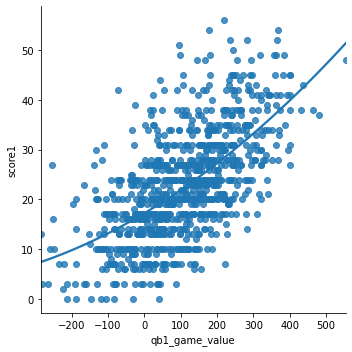

In [122]:
sn.lmplot(x="qb1_game_value", y="score1", data=dfKC, order=2, ci=None)

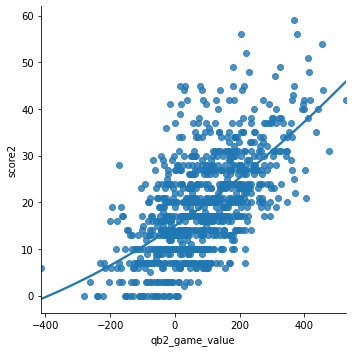

In [142]:
sn.lmplot(x="qb2_game_value", y="score2", data=dfKC, order=2, ci=None)

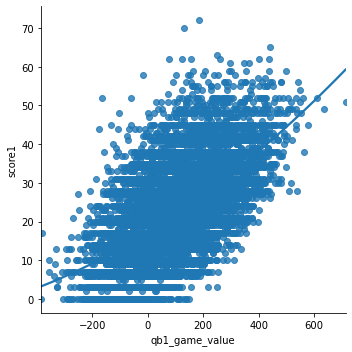

In [124]:
sn.lmplot(x="qb1_game_value", y="score1", data=dfAll, order=2, ci=None)

In [138]:
X=np.array(dfKC['qb1_game_value']).reshape(-1,1)
y=np.array(dfKC['score1']).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(X, y)
print('R squared:', model.score(X, y)) # R squared
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

R squared: 0.3834128464801818
Intercept: [17.4368671]
Coefficient: [[0.05039949]]


<function matplotlib.pyplot.show(*args, **kw)>

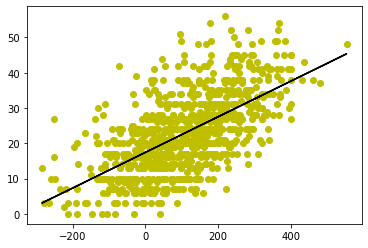

In [139]:
y_pred = model.predict(X)
plt.scatter(X, y, color='y')
plt.plot(X, y_pred, color='k')

plt.show

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

scaler = StandardScaler() 
    dfTest_scaled = scaler.fit_transform(dfKC) 
  
    # Normalizing the data so that  
    # the data approximately follows a Gaussian distribution 
    dfTest_normalized = normalize(dfTest_scaled) 
  
    # Converting the numpy array into a pandas DataFrame 
    dfTest_normalized = pd.DataFrame(dfTest_normalized)
    dfTest_normalized

    dfTest_normalized.columns = [var1, var2]